In [1]:
import sys
import os
import warnings
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist
import google.generativeai as genai
from dotenv import load_dotenv

if str(Path().resolve().parent) not in sys.path:
    sys.path.append(str(Path().resolve().parent))

load_dotenv()
GOOGLE_API_KEY = os.getenv("GOOGLE_API_KEY")
genai.configure(api_key=GOOGLE_API_KEY)

warnings.filterwarnings("ignore", category=FutureWarning)

from src.config import PREPROCESSED_BLOG_DATASET_PATH
from src.text_extraction import *
from src.models_setup import embedding_model
from src.blog_generator import BlogGenerator

In [2]:
blogs = pd.read_csv(PREPROCESSED_BLOG_DATASET_PATH)
paper_url = blogs.loc[0, "url_paper"]
paper_text = extract_paper_text(paper_url)

In [3]:
generator = BlogGenerator(max_attempts=1, use_memory=False, use_reflexion=False)

Loading vector store from: /home/kanstantsin-downar/PycharmProjects/bachalor-project/llm_blog_generator/data/vector_store
Vector store loaded successfully.
Loading long term memory module from: /home/kanstantsin-downar/PycharmProjects/bachalor-project/llm_blog_generator/data/long_term_memory
Long term memory module loaded successfully.
BlogGenerator initialized with vector store.


In [4]:
embeddings = []
for i in range(10):
    blog = generator.generate_blog(paper_text=paper_text)
    embedding = embedding_model.encode(blog)
    embeddings.append(embedding)

----------
Found most similar article.
Attempt number 1: Generating blog...
Using RAG prompt...
Checking request limits before invoking the model...
Invoking the model...
Model invoked successfully. Total requests today: 1, RPM: 1, TPM: 36195
Blog generated successfully.
Long term memory module saved successfully.
Saving blog in file: /home/kanstantsin-downar/PycharmProjects/bachalor-project/llm_blog_generator/data/generation_results/blog
Generated blog is saved in file: /home/kanstantsin-downar/PycharmProjects/bachalor-project/llm_blog_generator/data/generation_results/blog
----------
Found most similar article.
Attempt number 1: Generating blog...
Using RAG prompt...
Checking request limits before invoking the model...
Invoking the model...
Model invoked successfully. Total requests today: 2, RPM: 2, TPM: 72169
Blog generated successfully.
Long term memory module saved successfully.
Saving blog in file: /home/kanstantsin-downar/PycharmProjects/bachalor-project/llm_blog_generator/data

In [7]:
embeddings = np.array(embeddings)
distances = cdist(embeddings, embeddings, metric='euclidean')
print(f"Maximum distance between similar blogs: {np.max(distances):.1f}")

Maximum distance between similar blogs: 0.6


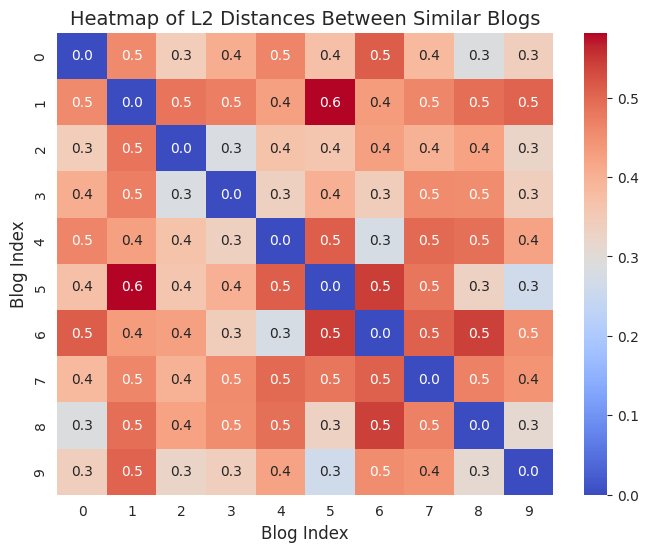

In [8]:
plt.figure(figsize=(8, 6))
sns.heatmap(distances, cmap='coolwarm', annot=True, fmt='.1f', cbar=True)

plt.title("Heatmap of L2 Distances Between Similar Blogs", fontsize=14)
plt.xlabel("Blog Index", fontsize=12)
plt.ylabel("Blog Index", fontsize=12)

plt.show()